In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("shopping_trends_updated.csv")
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### Cek Missing Data

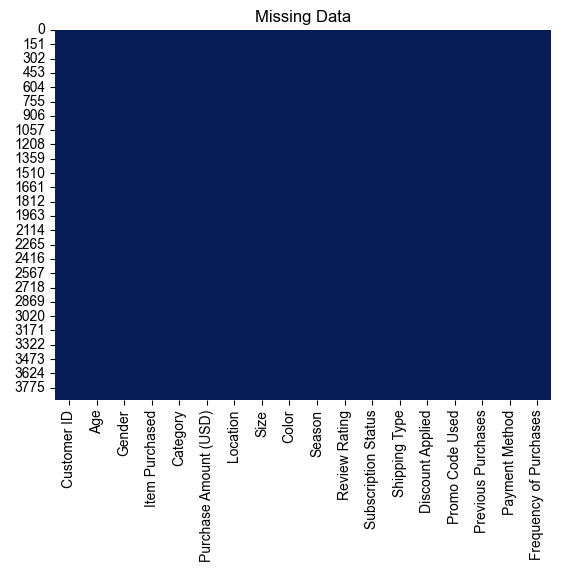

In [5]:
sns.heatmap(data.isnull(), cbar=False, cmap="YlGnBu_r")
sns.set(rc={'figure.figsize': (20, 8)})
plt.title('Missing Data')
plt.show()

In [6]:
Q1 = data['Purchase Amount (USD)'].quantile(0.25)
Q3 = data['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Purchase Amount (USD)'] < lower_bound) | (data['Purchase Amount (USD)'] > upper_bound)]

print("outliers:", len(outliers))
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("Outlier values:")
print(outliers['Purchase Amount (USD)'])


outliers: 0
Lower Bound: -24.0
Upper Bound: 144.0
Outlier values:
Series([], Name: Purchase Amount (USD), dtype: int64)


In [7]:
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

<Axes: xlabel='Frequency of Purchases', ylabel='Age'>

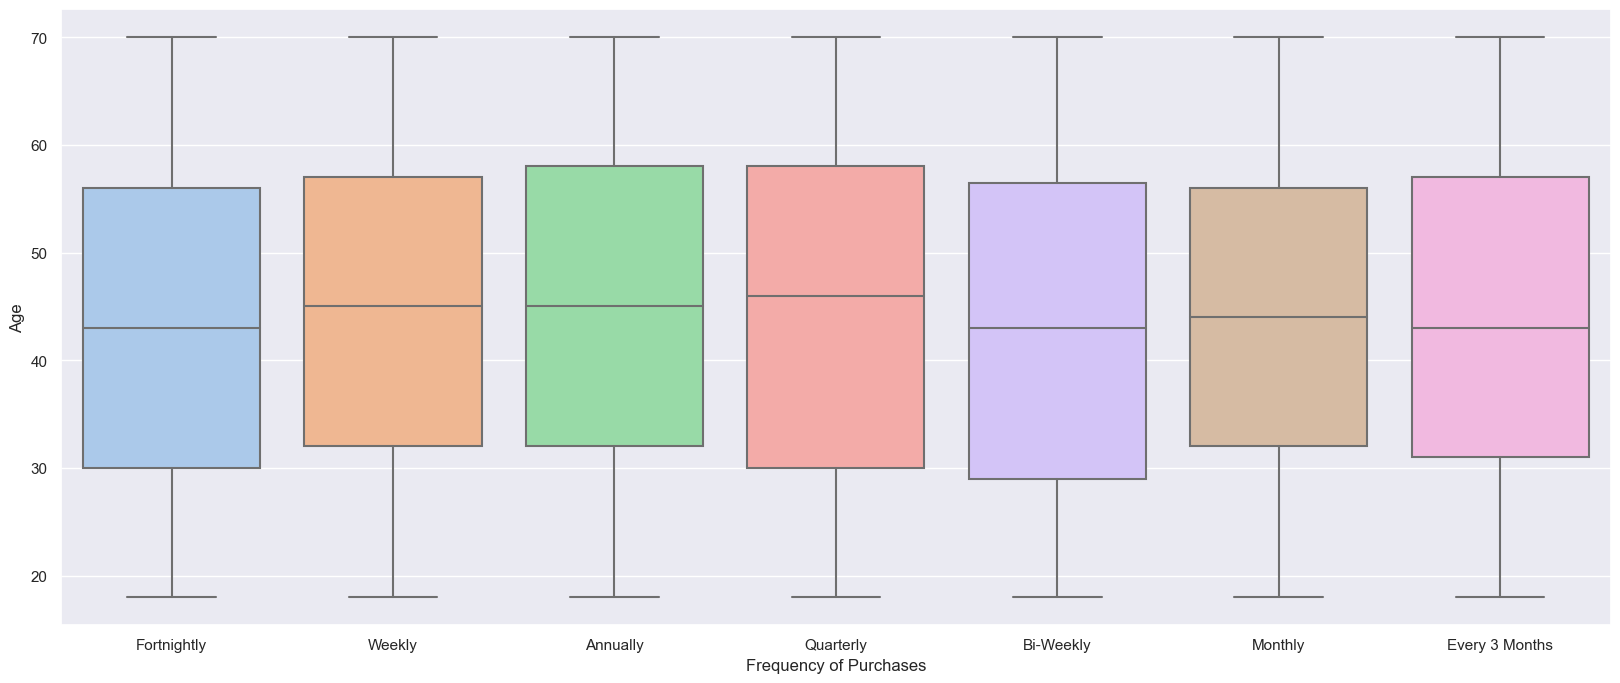

In [8]:
colors = sns.color_palette('pastel')
sns.boxplot(x="Frequency of Purchases", y="Age",data=data, palette=colors)

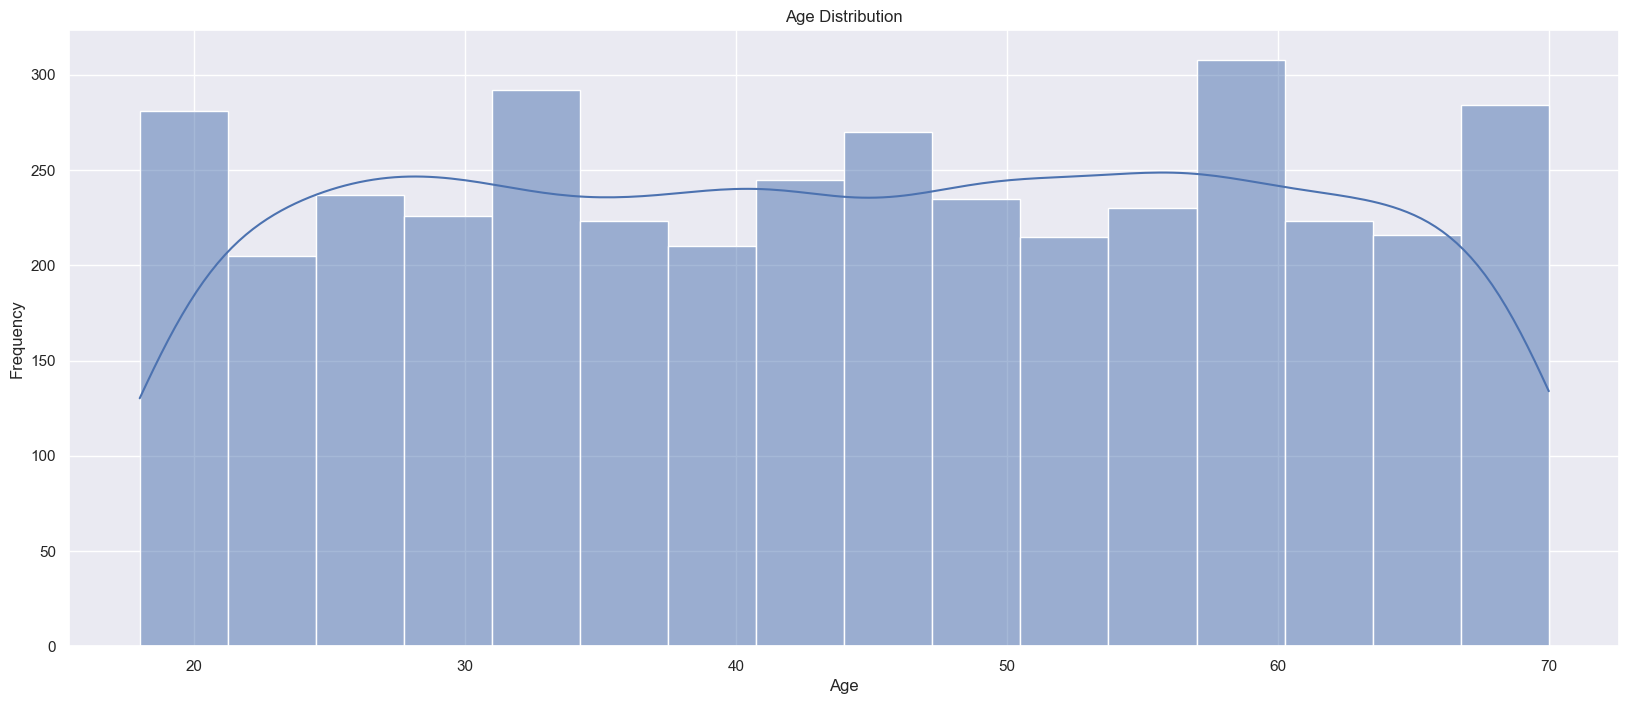

In [9]:
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

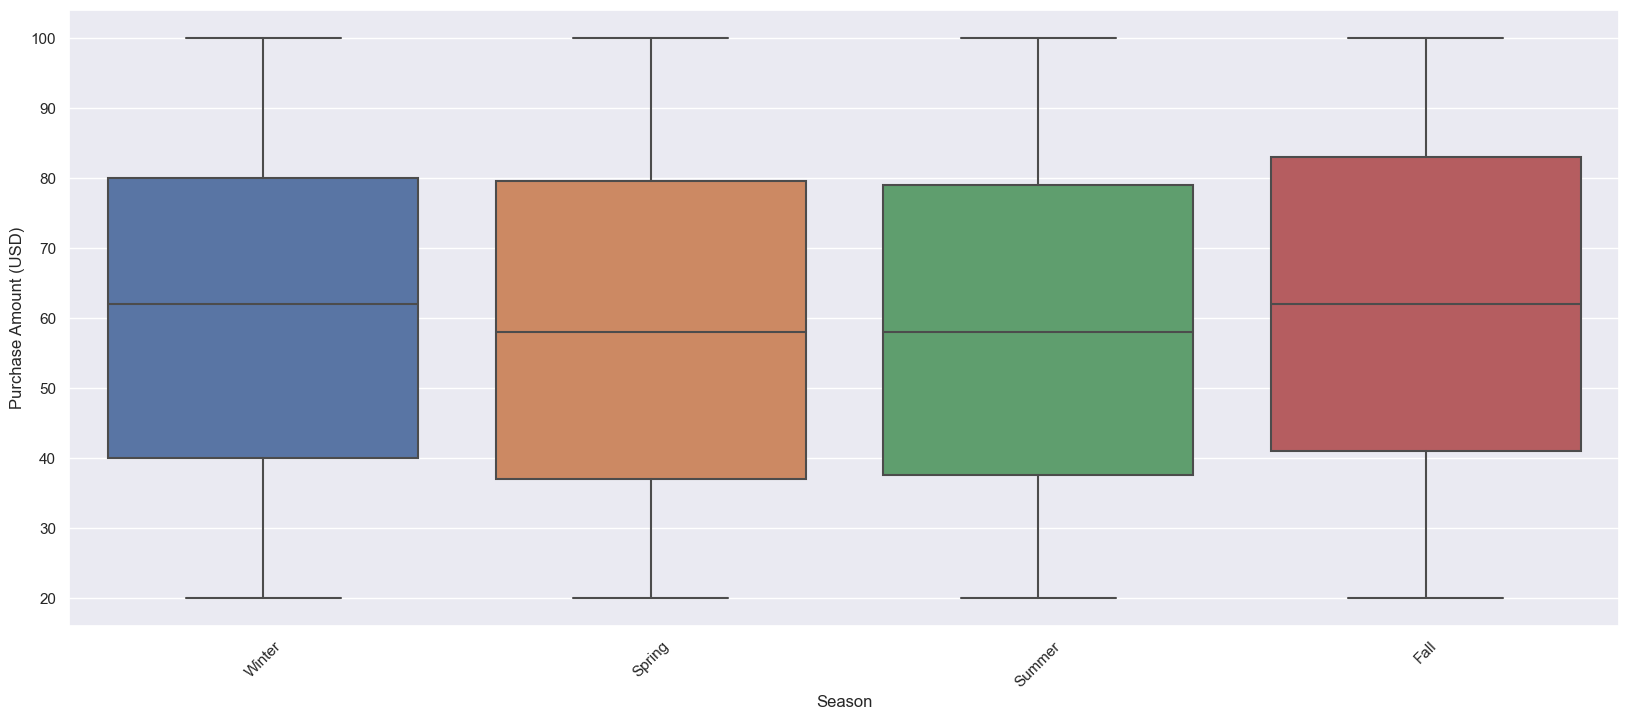

In [10]:
sns.boxplot(x='Season', y='Purchase Amount (USD)', data=data)
plt.xlabel('Season')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

### 3 Data Preprocessing and Preparation

In [11]:
age_bins = [0, 25, 40, 60, 100] 
age_labels = ['Young', 'Adult', 'Middle-Aged', 'Senior']
data['Age Category'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

data.drop(columns=['Age'], inplace=True)
data.head()


,Customer ID,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Category
0,1,1,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle-Aged
1,2,1,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young
2,3,1,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle-Aged
3,4,1,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young
4,5,1,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle-Aged


In [12]:
data = pd.get_dummies(data, columns=['Gender', 'Category'], drop_first=True)
data.head()

,Customer ID,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Category,Gender_1,Category_Clothing,Category_Footwear,Category_Outerwear
0,1,Blouse,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Middle-Aged,True,True,False,False
1,2,Sweater,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Young,True,True,False,False
2,3,Jeans,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Middle-Aged,True,True,False,False
3,4,Sandals,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young,True,False,True,False
4,5,Blouse,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Middle-Aged,True,True,False,False


In [13]:
from sklearn.preprocessing import MinMaxScaler
numerical_cols = ['Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
data.head()


,Customer ID,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Category,Gender_1,Category_Clothing,Category_Footwear,Category_Outerwear
0,1,Blouse,0.4125,Kentucky,L,Gray,Winter,0.24,Yes,Express,Yes,Yes,0.265306,Venmo,Fortnightly,Middle-Aged,True,True,False,False
1,2,Sweater,0.5500,Maine,L,Maroon,Winter,0.24,Yes,Express,Yes,Yes,0.020408,Cash,Fortnightly,Young,True,True,False,False
2,3,Jeans,0.6625,Massachusetts,S,Maroon,Spring,0.24,Yes,Free Shipping,Yes,Yes,0.448980,Credit Card,Weekly,Middle-Aged,True,True,False,False
3,4,Sandals,0.8750,Rhode Island,M,Maroon,Spring,0.40,Yes,Next Day Air,Yes,Yes,0.979592,PayPal,Weekly,Young,True,False,True,False
4,5,Blouse,0.3625,Oregon,M,Turquoise,Spring,0.08,Yes,Free Shipping,Yes,Yes,0.612245,PayPal,Annually,Middle-Aged,True,True,False,False
